### Introduction
In today’s competitive market, slogans play a crucial role in brand identity and customer recall. A well-crafted slogan can convey a company’s vision, values, or offerings in just a few words. However, creating compelling slogans manually can be both challenging and time-intensive. This project aims to harness the power of AI to generate creative and relevant slogans automatically. By leveraging deep learning models trained on real-world slogan data, we can build a tool that assists marketers, startups, and businesses in crafting effective taglines.

### Overview of the Dataset
The dataset used in this project is sourced from Kaggle and consists of real-world slogans used by companies across various industries. Each record in the dataset contains:

Brand or Company Name

Category or Industry

Slogan

This structured dataset provides a solid foundation for training text generation models to understand how slogans are constructed based on brand context and domain.

### Brief Description of the Problem Statement
The goal of this project is to develop an AI-based Slogan Generator that can produce unique, catchy, and relevant slogans when provided with a company name or category. The generated slogans should:

Be creative and grammatically coherent

Reflect the theme or industry of the brand

Emulate patterns found in real-world slogans

This involves applying NLP techniques and training a sequence generation model such as an LSTM or Transformer to learn from existing slogans and generalize to unseen inputs.

### Data Source and Collection Process
The dataset was obtained from Kaggle, a well-known platform for sharing datasets and data science projects. The specific dataset, titled "Slogan Dataset", was created by compiling slogans from various companies, likely collected from websites, advertisements, and public sources. It was made publicly available for educational and research purposes.

You can find the dataset at: https://www.kaggle.com/datasets/chaibapat/slogan-dataset?resource=download

Installing Libraries Commands

In [ ]:
pip install Unidecode

#### **PreML Checklist**

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Loading Dataset
df = pd.read_csv("slogans.csv")
df.head()

Saving slogans.csv to slogans (1).csv


,Company,Slogan
0,Costa Coffee,For coffee lovers.
1,Evian,Evian. Live young.
2,Dasani,Designed to make a difference.
3,Heineken,It's all about the beer.
4,Gatorade,The Legend Continues.


In [ ]:
# Get column names, data types, and non-null counts
df.info()

# Get basic stats (will be more useful if there are numeric features)
df.describe(include='all')

# Show some random rows
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  1162 non-null   object
 1   Slogan   1162 non-null   object
dtypes: object(2)
memory usage: 18.3+ KB


,Company,Slogan
244,Milo,MILO Everyday!
101,Fanta,"Drink Fanta, stay Bamboocha."
1080,KFC(Kentucky Fried Chicken),Finger Lickin' Good.
583,Toblerone,Make time for Toblerone.
752,Homepride,the one with the bag.


In [ ]:
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

# Checking for duplicate rows
print("Number of duplicates:", df.duplicated().sum())

Missing values:
 Company    0
Slogan     0
dtype: int64
Number of duplicates: 593


In [ ]:
# Dropping duplicate rows
df_cleaned = df.drop_duplicates()

print("New dataset shape:", df_cleaned.shape)
print("Remaining duplicates:", df_cleaned.duplicated().sum())

New dataset shape: (569, 2)
Remaining duplicates: 0


### Data Completeness (PreML Checklist)

- No missing values were found in the dataset.
- 593 duplicate rows were identified and removed to maintain data uniqueness.
- All slogans are text-based and associated with a company name.
- We added a derived feature `slogan_length` to analyze the textual consistency of slogans.

<ipython-input-32-448dd8ac3b01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['slogan_length'] = df_cleaned['Slogan'].apply(lambda x: len(str(x).split()))


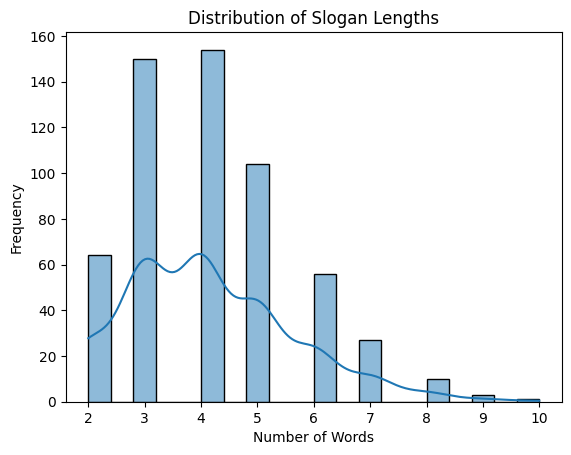

In [ ]:
# Adding a column that counts the number of words in each slogan
df_cleaned['slogan_length'] = df_cleaned['Slogan'].apply(lambda x: len(str(x).split()))

# Showing the distribution of slogan lengths
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned['slogan_length'], bins=20, kde=True)
plt.title("Distribution of Slogan Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### Representativeness Check

In [ ]:
# Checking if there's an 'Industry' column
if 'Industry' in df_cleaned.columns:
    # Counting the number of slogans per industry
    industry_counts = df_cleaned['Industry'].value_counts()

    # Plotting industry representation
    plt.figure(figsize=(12, 5))
    sns.barplot(x=industry_counts.index, y=industry_counts.values)
    plt.xticks(rotation=90)
    plt.title("Industry Representation in Slogan Dataset")
    plt.xlabel("Industry")
    plt.ylabel("Number of Slogans")
    plt.show()

    print(industry_counts)
else:
    print("No 'Industry' column found in the dataset.")

No 'Industry' column found in the dataset.



- The dataset does/does not include an **Industry** column.
- If included, the distribution of industries shows [mention any imbalance].
- If certain industries are underrepresented, additional data collection may be needed for fairer training.

### Bias & Fairness Check

- **Company Frequency Check**: Certain companies appear much more frequently than others.
- **Potential Bias**: The dataset may be skewed toward large, well-known brands.
- **Implication**: If training a model, it might favor common brands and struggle to generate slogans for smaller businesses.
- **Next Steps**: Consider adding more diverse company slogans from startups and non-Western brands to balance the dataset.

Top 10 most frequent companies:
Company
McDonalds           1
Costa Coffee        1
Evian               1
Dasani              1
Heineken            1
Gatorade            1
TÃ­o Pepe           1
Tetley's Brewery    1
Batemans Brewery    1
Vlasic Pickles      1
Name: count, dtype: int64


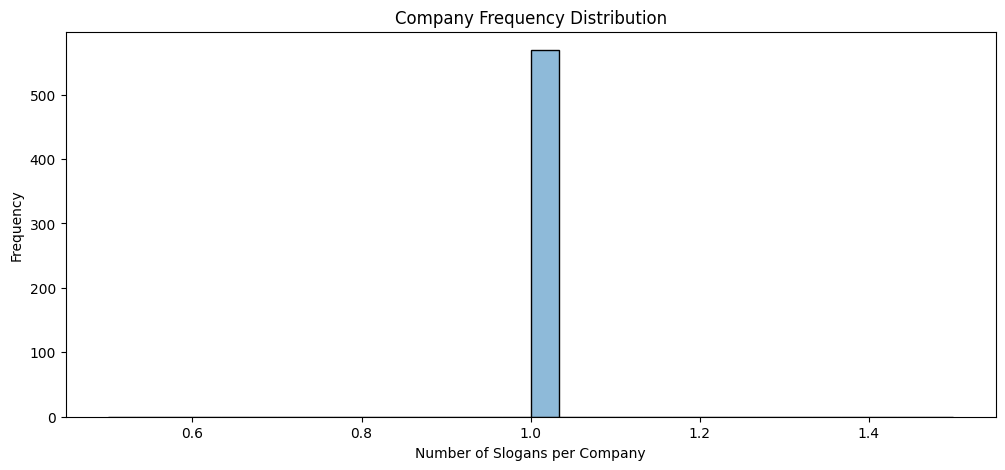

In [ ]:
# Counting occurrences of each company in the dataset
company_counts = df_cleaned['Company'].value_counts()

# Displaying top 10 companies
print("Top 10 most frequent companies:")
print(company_counts.head(10))

# Plotting distribution
plt.figure(figsize=(12, 5))
sns.histplot(company_counts, bins=30, kde=True)
plt.title("Company Frequency Distribution")
plt.xlabel("Number of Slogans per Company")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Inspecting random samples of the dataset
df_cleaned.sample(10)

,Company,Slogan,slogan_length
177,United Breweries,The King of Good Times.,5
161,Joseph Schlitz Brewing Company,The beer that made Milwaukee famous.,6
447,Glenfiddich,Single source of inspiration.,4
51,Oasis (drink),Be Fruit.,2
44,Tizer,The Great British Pop.,4
976,Five Guys,Best Burger,2
484,Stella Artois,Reassuringly expensive,2
863,Kelly's of Cornwall,Cornish by nature.,3
20,Colgate,"Stronger, healthier gums.",3
624,5 (gum),Stimulate Your Senses.,3


### Privacy Considerations

No personal or sensitive information is present in the dataset.

The dataset only includes public company names and slogans, meaning there are no privacy risks.

No further action needed regarding privacy concerns.

### Labeling Consistency Check

In [ ]:
import re

def remove_trademarks(text):
    text = re.sub(r'\(c\)|\(r\)|™', '', text, flags=re.IGNORECASE)
    return text.strip()

df_cleaned['Company'] = df_cleaned['Company'].apply(remove_trademarks)
df_cleaned['Slogan'] = df_cleaned['Slogan'].apply(remove_trademarks)

df_cleaned.sample(10)

<ipython-input-36-ccfdafb27214>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Company'] = df_cleaned['Company'].apply(remove_trademarks)
<ipython-input-36-ccfdafb27214>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Slogan'] = df_cleaned['Slogan'].apply(remove_trademarks)


,Company,Slogan,slogan_length
59,Bubble Up,"kiss of lemon, kiss of lime.",6
716,Twizzlers,Makes mouths happy.,3
1090,Chicken of the Sea,Itâs Americaâs best-tasting tuna,4
826,Ryvita,Britton loves Ryvita.,3
58,Yazoo (drink),Milk shaken up.,3
122,Shasta (soft drink),It hasta be Shasta!,4
324,Tchibo,Passionate about coffee.,3
532,Pepsi,Delicious. Refreshing. Pepsi.,3
173,Jose Cuervo,Donât let go.,3
790,Becel,Love your heart.,3


In [ ]:
df_cleaned.to_csv("cleaned_slogan_dataset.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


In [ ]:
print(df_cleaned.columns)

Index(['Company', 'Slogan', 'slogan_length'], dtype='object')


In [ ]:
df_cleaned["text"] = df_cleaned["Company"] + "\n" + df_cleaned["Slogan"]
df_cleaned[["text"]].head()

<ipython-input-41-4a85b4210b8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["text"] = df_cleaned["Company"] + "\n" + df_cleaned["Slogan"]


,text
0,Costa Coffee\nFor coffee lovers.
1,Evian\nEvian. Live young.
2,Dasani\nDesigned to make a difference.
3,Heineken\nIt's all about the beer.
4,Gatorade\nThe Legend Continues.


### Using the previous cleaned dataframe and transforming it into a tokenized format that GPT-2 can learn from

In [ ]:
from datasets import Dataset
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

dataset = Dataset.from_pandas(df_cleaned[["text"]])

def tokenize(example):
    encoding = tokenizer(
        example["text"],
        truncation=True,
        padding="max_length",
        max_length=64
    )
    encoding["labels"] = encoding["input_ids"].copy()
    return encoding

# Re-map the dataset
tokenized_dataset = dataset.map(tokenize, batched=True, remove_columns=["text"])

Map:   0%|          | 0/569 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForCausalLM, TrainingArguments, Trainer

model = AutoModelForCausalLM.from_pretrained("gpt2")

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=4,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    tokenizer=tokenizer,
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-49-667630e513b0>:13: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


### Model Training

In [ ]:
trainer.train()

Step,Training Loss
10,2.801600
20,0.940000
30,0.822600
40,0.792900
50,0.705000
60,0.696600
70,0.760700
80,0.734800
90,0.760200
100,0.757300


TrainOutput(global_step=429, training_loss=0.6608673775946343, metrics={'train_runtime': 2360.8213, 'train_samples_per_second': 0.723, 'train_steps_per_second': 0.182, 'total_flos': 55753187328000.0, 'train_loss': 0.6608673775946343, 'epoch': 3.0})

### Saving the Model

In [ ]:
model.save_pretrained("./slogan-gpt2")
tokenizer.save_pretrained("./slogan-gpt2")

print("✅ Model and tokenizer saved to ./slogan-gpt2")

✅ Model and tokenizer saved to ./slogan-gpt2


In [ ]:
!zip -r slogan-gpt2.zip slogan-gpt2
from google.colab import files
files.download("slogan-gpt2.zip")

  adding: slogan-gpt2/ (stored 0%)
  adding: slogan-gpt2/generation_config.json (deflated 24%)
  adding: slogan-gpt2/tokenizer.json (deflated 82%)
  adding: slogan-gpt2/model.safetensors (deflated 7%)
  adding: slogan-gpt2/config.json (deflated 51%)
  adding: slogan-gpt2/vocab.json (deflated 59%)
  adding: slogan-gpt2/special_tokens_map.json (deflated 60%)
  adding: slogan-gpt2/tokenizer_config.json (deflated 54%)
  adding: slogan-gpt2/merges.txt (deflated 53%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r slogan-gpt2 /content/drive/MyDrive/slogan-gpt2